In [2]:
# Import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from astropy.io import fits

<h1 align='center'> Fits Files Info Spectrum/Bias/Flat <h1>

In [3]:
# Read calibrated spectrum
sf = fits.open("SFinalSpec.fits") 

# Read master bias and master flat
b = fits.open("bias_s.fits")
fl = fits.open("nflat_R400_750.fits")

# Read Spectrum Data
spec_data = sf[0].data
spec_header = sf[0].header

# Read flats and Bias
flat_data = fl[-1].data
flat_header = fl[0].header
bias_header= b[0].header

# Gather all bias images and horizontally stack them horizontally
bias_data = b[1].data
for i in range(2,len(b)):
    tmp_data = b[i].data
    bias_data = np.hstack((bias_data,tmp_data))
g = fits.open("gsgS20201223S0023_001.fits")
g.info()

Filename: gsgS20201223S0023_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (3132, 2088)   float32   


<h2 align='center'> Spectrum/Bias/Flat Header <h2>

In [4]:
#spec_header
#bias_header
#flat_header

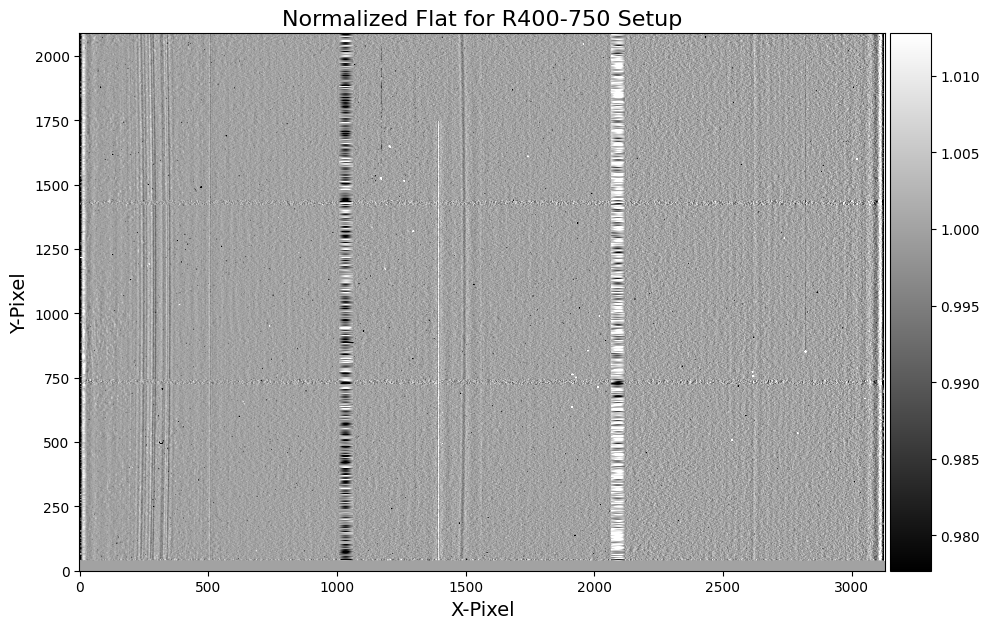

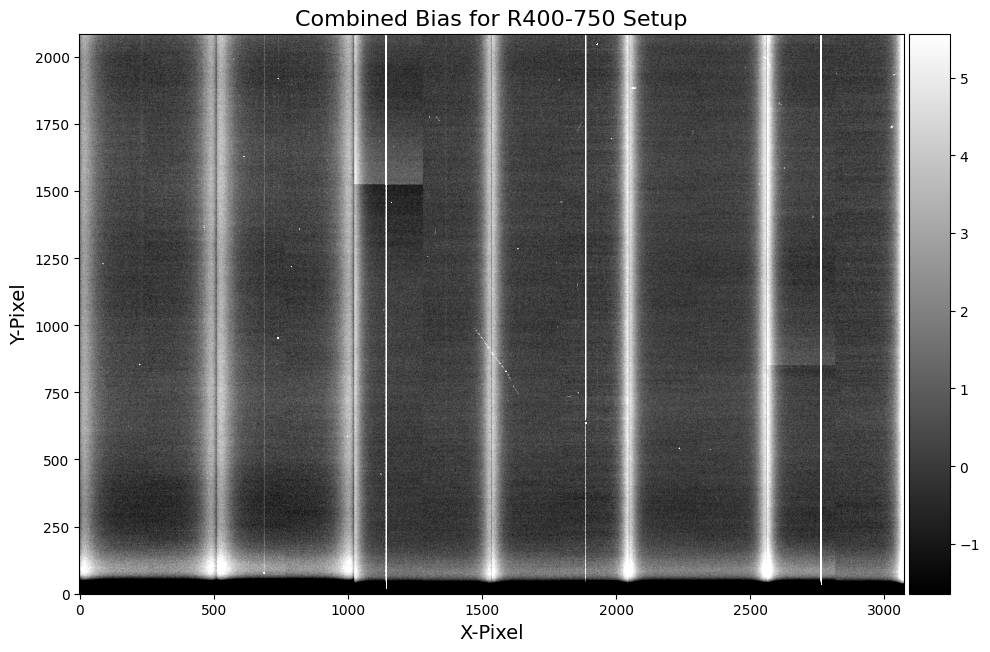

In [5]:
# Plot bias and flats
fig, a1 = plt.subplots(figsize=(10,7),ncols=1)

im1 = a1.imshow(flat_data,cmap='gray',origin='lower',vmax=np.percentile(flat_data,95),vmin=np.percentile(flat_data,1))
divider = make_axes_locatable(a1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
a1.set_title("Normalized Flat for R400-750 Setup",fontsize=16)
a1.set_xlabel("X-Pixel",fontsize=14)
a1.set_ylabel("Y-Pixel",fontsize=14)
plt.tight_layout()
plt.savefig("NFlat750.png")
plt.show()

fig, a1 = plt.subplots(figsize=(10,7),ncols=1)
im1 = a1.imshow(bias_data,cmap='gray',origin='lower',vmin=np.percentile(bias_data,5),vmax=np.percentile(bias_data,99))
divider = make_axes_locatable(a1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')
a1.set_title("Combined Bias for R400-750 Setup",fontsize=16)
a1.set_xlabel("X-Pixel",fontsize=14)
a1.set_ylabel("Y-Pixel",fontsize=14)
plt.tight_layout()
plt.savefig("MBias750.png")
plt.show()


In [7]:
Wave, Flux = np.loadtxt("/Users/patri/Desktop/SURP_Stuff/ZN7090/ZN7090_Spectra/Flux/SFinalSpec.dat",dtype=float,skiprows=70,unpack=True)
New_Wave, New_Flux = np.loadtxt("/Users/patri/Desktop/SURP_Stuff/ZN7090/ZN7090_Spectra/Flux/Better.dat",dtype=float,skiprows=70,unpack=True)

In [8]:
print(np.max(Wave))
print(np.min(Wave))

9978.36718750007
5167.369140625


In [9]:
# Setup plotting style 
style = 'default'
tdir = 'in'

major=5
minor=3

font = 'serif'

plt.style.use(style)

plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir

plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

plt.rcParams['font.family'] = font

<h2 style="text-align:center;">Combine 3 out of 4 spectrum</h2>
We are discarding the spectrum collected from the R400-750 setup due to its noise

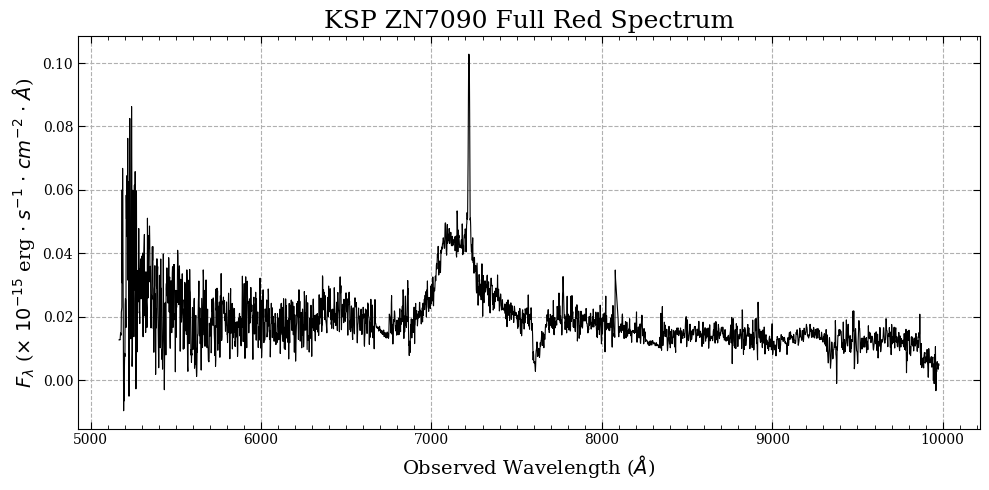

In [10]:
fig, a0 = plt.subplots(figsize=(10,5))
a0.plot(Wave,Flux,c='k',linewidth=0.8)
a0.set_ylabel(r"$F_{\lambda}$ ($\times$ $10^{-15}$ erg $\cdot$ $s^{-1}$ $\cdot$ $cm^{-2}$ $\cdot$ $\AA$)",fontsize=14)
a0.set_xlabel(r"Observed Wavelength ($\AA$)",fontsize=14)
a0.set_title("KSP ZN7090 Full Red Spectrum",fontsize=18)
a0.grid(ls="--")
a0.xaxis.set_minor_locator(MultipleLocator(100))
#a0.yaxis.set_minor_locator(MultipleLocator(0.005))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
plt.tight_layout()
#plt.savefig("SpecPlot.png")

<h2 style="text-align:center;">Combined 4 out of 4 Spectrums</h2>
Here we include the spectrum from R400-750 setup, however, we see an issue with the chip gas creating artifact emission and absorbtion-like features

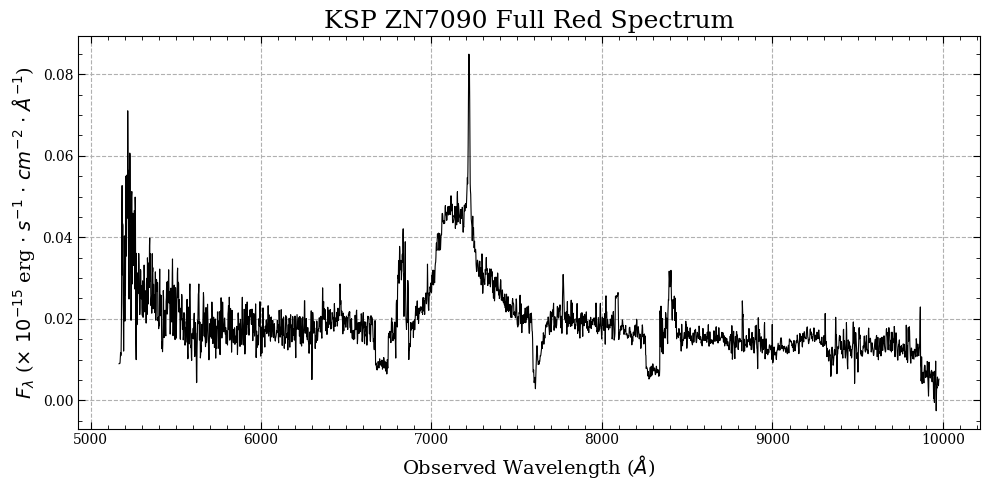

In [11]:
fig, a0 = plt.subplots(figsize=(10,5))
a0.plot(New_Wave,New_Flux,c='k',linewidth=0.8)
a0.set_ylabel(r"$F_{\lambda}$ ($\times$ $10^{-15}$ erg $\cdot$ $s^{-1}$ $\cdot$ $cm^{-2}$ $\cdot$ $\AA^{-1}$)",fontsize=14)
a0.set_xlabel(r"Observed Wavelength ($\AA$)",fontsize=14)
a0.set_title("KSP ZN7090 Full Red Spectrum",fontsize=18)
a0.grid(ls="--")
a0.xaxis.set_minor_locator(MultipleLocator(100))
a0.yaxis.set_minor_locator(MultipleLocator(0.005))
a0.yaxis.set_ticks_position('both') 
a0.xaxis.set_ticks_position('both')
plt.tight_layout()
plt.savefig("SpecPlot.png")

Chip gaps are becoming an issue, we see that the chip the ranges of wavelengths where the chip gap is located there is either an emssion or absorption feature. We will need to combine the spectra under my own functions.

In [ ]:
# Load the spectrums

* From literature the redshift is estimated by fitting a gaussian to the broad line features and using the mean of the fitted Gaussian against the rest wavelenght of the known emission line.
* The width of broad emission lines have information about the thermal velocity and kinetic velocity of the expanding ejecta
* From empirical comparison I belive the broad emission line is a H-alpha emission


<h2 align='center'>Measuring Redshift<h2>

In [12]:
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.interpolate import CubicSpline,interp1d,PPoly,barycentric_interpolate
# Load the galaxy interpolated spectrum 
Gal_Wave, Gal_Flux = np.loadtxt("/Users/patri/Desktop/SURP_Stuff/ZN7090/ZN7090_Spectra/Flux/GalaxyCrop.dat",dtype=float,skiprows=70,unpack=True)

# Slice spectrum on broad line feature
lower = 6880
upper = 7530

wave_domain= Gal_Wave[np.where((Gal_Wave>lower) & (Gal_Wave<upper))]
flux_domain = Gal_Flux[np.where((Gal_Wave>lower) & (Gal_Wave<upper))]

# Define Gaussian pdf
def pdf(x,H,A,mu,sigma):
    return(H + A*np.exp(-(x-mu)**2/(2*sigma**2)))

popt, pcov = curve_fit(pdf,wave_domain,flux_domain)
print(popt)
print(pcov)


[0.03242692 1.         1.         1.        ]
[[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
